<img align="left" src="https://github.com/GarethSequeira/Big-Mart-Analysis/blob/main/BigMart/Images/BigMartRect.png?raw=true" width="100%">

<br><br>  
  
# Big Mart Analysis 

#### Install Packages Required

In [1]:
install.packages("data.table") #To read and manipulate data
install.packages("dplyr")      #Manipulation and joining
install.packages("ggplot2")    #Plotting 
install.packages("caret")      #For Modeling
install.packages("corrplot")   #Co-relationp plotting
install.packages("xgboost")    #Building an xgboost model
install.packages("cowplot")    #Combining multiple plots

package 'data.table' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'data.table'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Owner\anaconda3\envs\DAVCaseStudy\Lib\R\library\00LOCK\data.table\libs\x64\datatable.dll to C:\Users\Owner\anaconda3\envs\DAVCaseStudy\Lib\R\library\data.table\libs\x64\datatable.dll: Permission denied"Warning message:
"restored 'data.table'"


The downloaded binary packages are in
	C:\Users\Owner\AppData\Local\Temp\Rtmp2bVuHm\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Owner\anaconda3\envs\DAVCaseStudy\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\Owner\anaconda3\envs\DAVCaseStudy\Lib\R\library\dplyr\libs\x64\dplyr.dll: Permission denied"Warning message:
"restored 'dplyr'"


The downloaded binary packages are in
	C:\Users\Owner\AppData\Local\Temp\Rtmp2bVuHm\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Owner\AppData\Local\Temp\Rtmp2bVuHm\downloaded_packages

  There is a binary version available but the source version is later:
      binary source needs_compilation
caret 6.0-86 6.0-88              TRUE

  Binaries will be installed
package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Owner\anaconda3\envs\DAVCaseStudy\Lib\R\library\00LOCK\caret\libs\x64\caret.dll to C:\Users\Owner\anaconda3\envs\DAVCaseStudy\Lib\R\library\caret\libs\x64\caret.dll: Permission denied"Warning message:
"restored 'caret'"


The downloaded binary packages are in
	C:\Users\Owner\AppData\Local\Temp\Rtmp2bVuHm\downloaded_packages

  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.89             FALSE



installing the source package 'corrplot'



package 'xgboost' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'xgboost'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Owner\anaconda3\envs\DAVCaseStudy\Lib\R\library\00LOCK\xgboost\libs\x64\xgboost.dll to C:\Users\Owner\anaconda3\envs\DAVCaseStudy\Lib\R\library\xgboost\libs\x64\xgboost.dll: Permission denied"Warning message:
"restored 'xgboost'"


The downloaded binary packages are in
	C:\Users\Owner\AppData\Local\Temp\Rtmp2bVuHm\downloaded_packages
package 'cowplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Owner\AppData\Local\Temp\Rtmp2bVuHm\downloaded_packages


#### Load Installed Packages

In [2]:
library(data.table)
library(dplyr)
library(ggplot2)
library(caret)
library(corrplot)
library(e1071)
library(xgboost)
library(cowplot)

Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"corrplot 0.89 loaded
Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'xgboost' was built under R version 3.6.3"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice

Warning message:
"package 'cowplot' was built under R version 3.6.3"

#### Read the Data

In [3]:
train = fread("Training.csv")
test = fread("Testing.csv")
submission = fread("SampleSubmission.csv")

In [4]:
names(train)

[1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"               "Item_Outlet_Sales"

In [5]:
names(test)

[1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"

In [6]:
str(train)

Classes 'data.table' and 'data.frame':	8523 obs. of  12 variables:
 $ Item_Identifier          : chr  "FDA15" "DRC01" "FDN15" "FDX07" ...
 $ Item_Weight              : num  9.3 5.92 17.5 19.2 8.93 ...
 $ Item_Fat_Content         : chr  "Low Fat" "Regular" "Low Fat" "Regular" ...
 $ Item_Visibility          : num  0.016 0.0193 0.0168 0 0 ...
 $ Item_Type                : chr  "Dairy" "Soft Drinks" "Meat" "Fruits and Vegetables" ...
 $ Item_MRP                 : num  249.8 48.3 141.6 182.1 53.9 ...
 $ Outlet_Identifier        : chr  "OUT049" "OUT018" "OUT049" "OUT010" ...
 $ Outlet_Establishment_Year: int  1999 2009 1999 1998 1987 2009 1987 1985 2002 2007 ...
 $ Outlet_Size              : chr  "Medium" "Medium" "Medium" "" ...
 $ Outlet_Location_Type     : chr  "Tier 1" "Tier 3" "Tier 1" "Tier 3" ...
 $ Outlet_Type              : chr  "Supermarket Type1" "Supermarket Type2" "Supermarket Type1" "Grocery Store" ...
 $ Item_Outlet_Sales        : num  3735 443 2097 732 995 ...
 - attr(*, ".i

In [7]:
str(test)

Classes 'data.table' and 'data.frame':	5681 obs. of  11 variables:
 $ Item_Identifier          : chr  "FDW58" "FDW14" "NCN55" "FDQ58" ...
 $ Item_Weight              : num  20.75 8.3 14.6 7.32 NA ...
 $ Item_Fat_Content         : chr  "Low Fat" "reg" "Low Fat" "Low Fat" ...
 $ Item_Visibility          : num  0.00756 0.03843 0.09957 0.01539 0.1186 ...
 $ Item_Type                : chr  "Snack Foods" "Dairy" "Others" "Snack Foods" ...
 $ Item_MRP                 : num  107.9 87.3 241.8 155 234.2 ...
 $ Outlet_Identifier        : chr  "OUT049" "OUT017" "OUT010" "OUT017" ...
 $ Outlet_Establishment_Year: int  1999 2007 1998 2007 1985 1997 2009 1985 2002 2007 ...
 $ Outlet_Size              : chr  "Medium" "" "" "" ...
 $ Outlet_Location_Type     : chr  "Tier 1" "Tier 2" "Tier 3" "Tier 2" ...
 $ Outlet_Type              : chr  "Supermarket Type1" "Supermarket Type1" "Grocery Store" "Supermarket Type1" ...
 - attr(*, ".internal.selfref")=<externalptr> 


#### Dimensions of Data

In [8]:
dim(train);dim(test)

[1] 8523   12

[1] 5681   11

#### Combine Train and Test Data:

In [9]:
test[,Item_Outlet_Sales := NA]
combi = rbind(train, test) # combining train and test datasets
dim(combi)

[1] 14204    12

<br>

# Exploratory Data Analysis
## Univariate Analysis

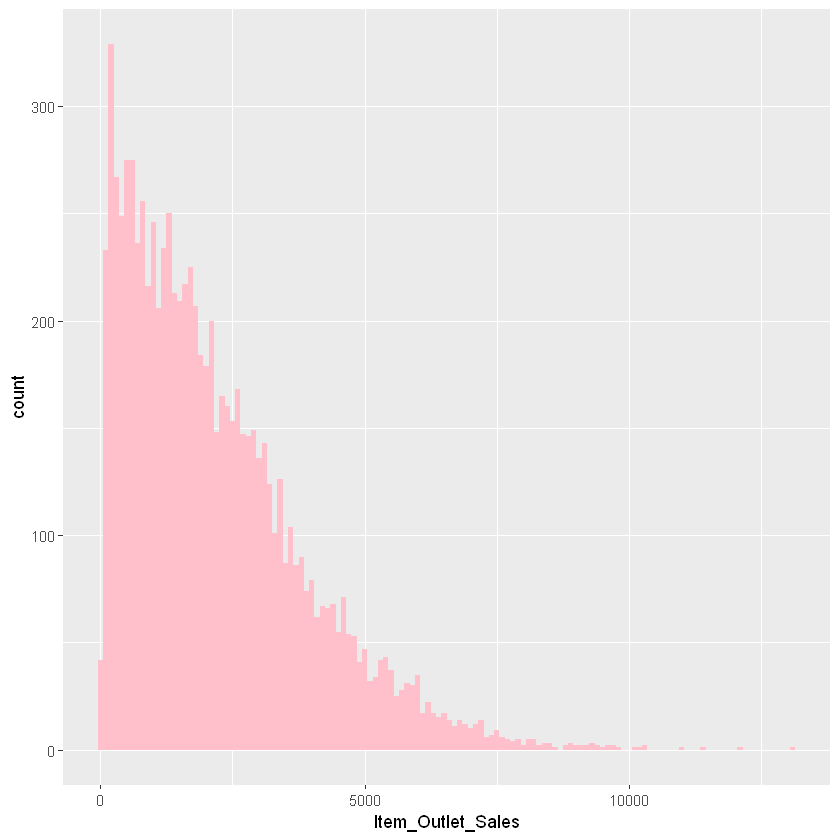

In [10]:
ggplot(train) + geom_histogram(aes(train$Item_Outlet_Sales), binwidth = 100, fill = "pink") +xlab("Item_Outlet_Sales")

<br>  
  
#### Independent Numeric Variables

Warning message:
"Removed 2439 rows containing non-finite values (stat_bin)."

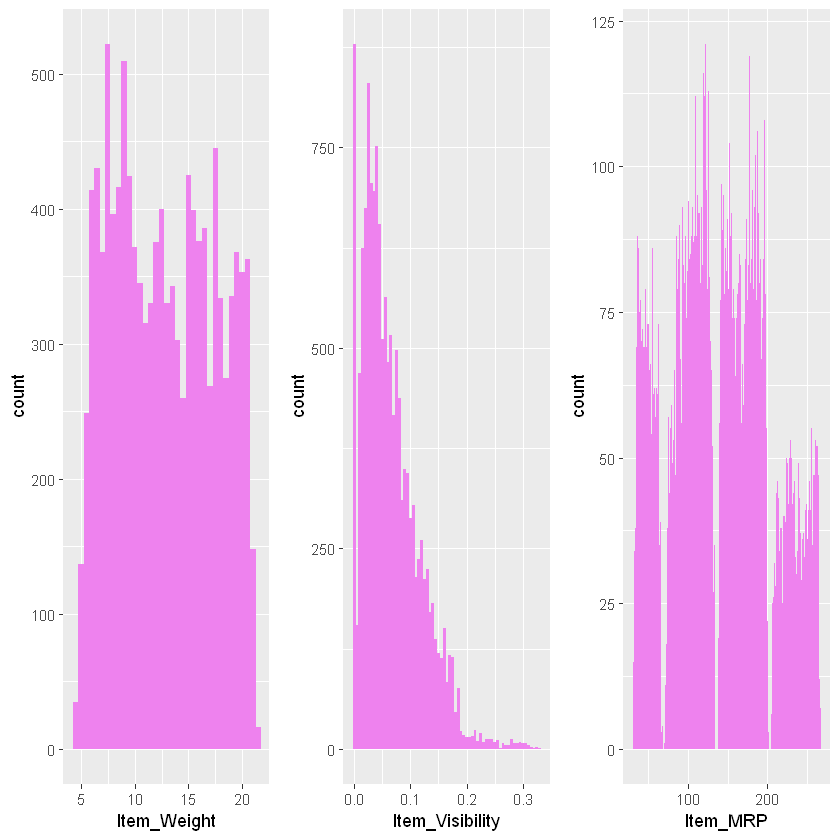

In [11]:
p1 = ggplot(combi) + geom_histogram(aes(Item_Weight), binwidth = 0.5, fill = "violet")
p2 = ggplot(combi) + geom_histogram(aes(Item_Visibility), binwidth = 0.005, fill = "violet")
p3 = ggplot(combi) + geom_histogram(aes(Item_MRP), binwidth = 1, fill = "violet")
plot_grid(p1, p2, p3, nrow = 1) # plot_grid() from cowplot package

<br>  
  
#### Independent Categorical Variables

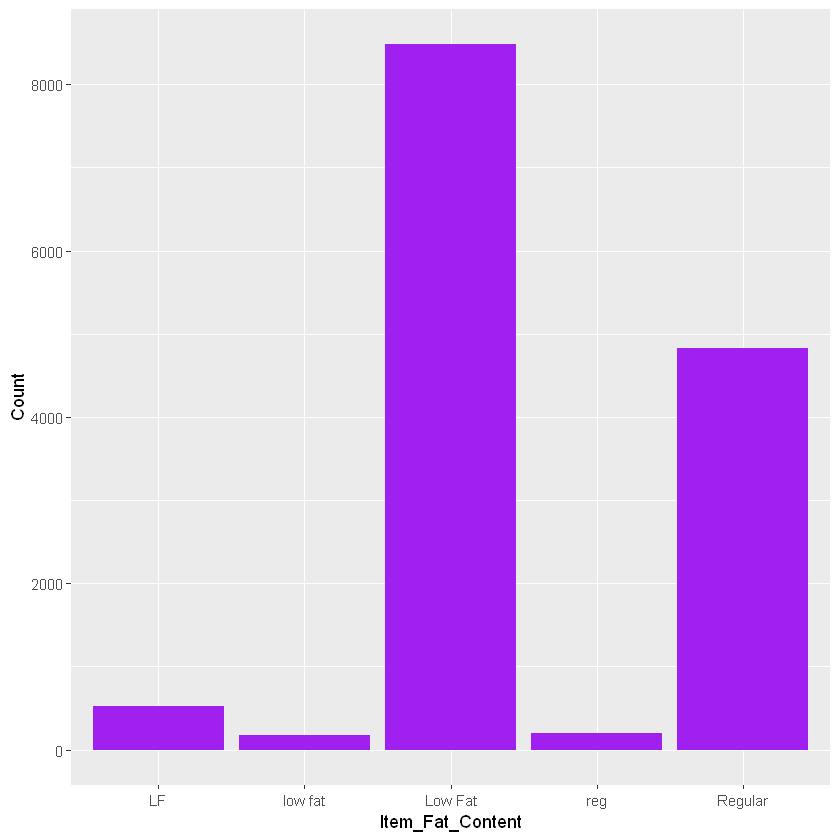

In [12]:
ggplot(combi %>% group_by(Item_Fat_Content) %>% summarise(Count = n())) + 
  geom_bar(aes(Item_Fat_Content, Count), stat = "identity", fill = "purple")

<br>  
  
#### Combination of Lowfat and Regular Proucts

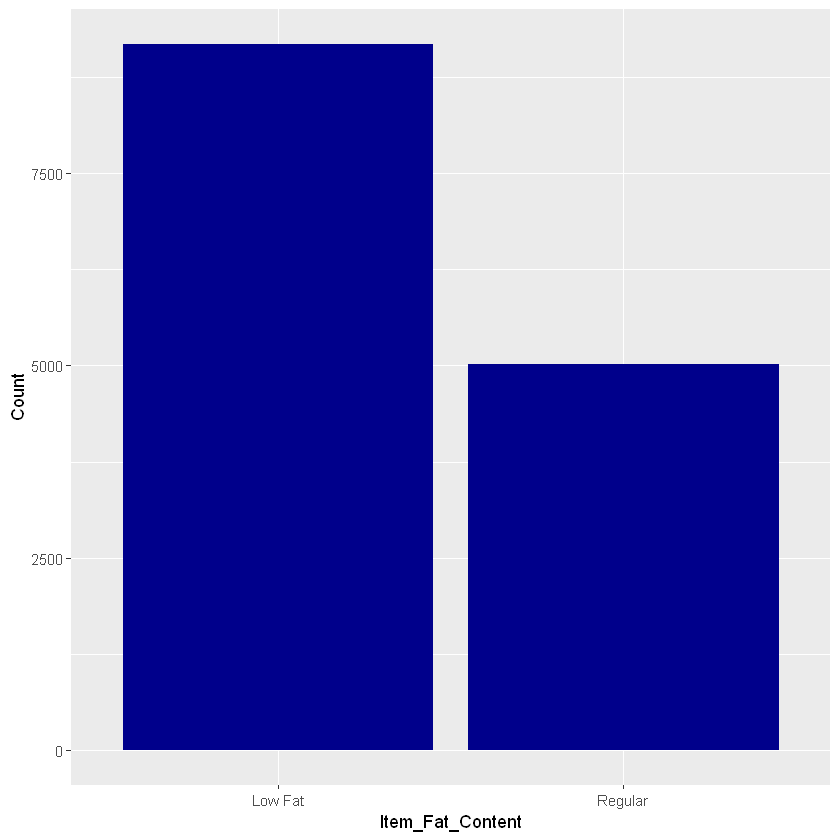

In [13]:
combi$Item_Fat_Content[combi$Item_Fat_Content == "LF"] = "Low Fat"
combi$Item_Fat_Content[combi$Item_Fat_Content == "low fat"] = "Low Fat"
combi$Item_Fat_Content[combi$Item_Fat_Content == "reg"] = "Regular"
ggplot(combi %>% group_by(Item_Fat_Content) %>% summarise(Count = n())) + 
  geom_bar(aes(Item_Fat_Content, Count), stat = "identity", fill = "darkblue")

<br>  
  
#### Check other Categorical Variables

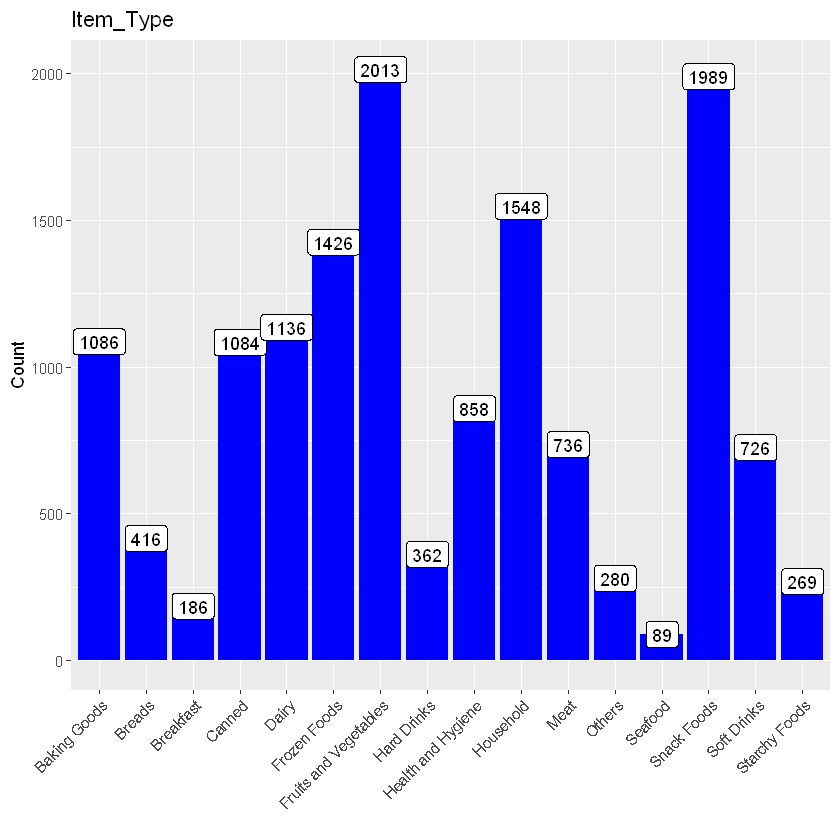

In [14]:
# Plot for Item_Type
p4 = ggplot(combi %>% group_by(Item_Type) %>% summarise(Count = n())) + 
  geom_bar(aes(Item_Type, Count), stat = "identity", fill = "blue") +
  xlab("") +
  geom_label(aes(Item_Type, Count, label = Count), vjust = 0.5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))+
  ggtitle("Item_Type")

p4

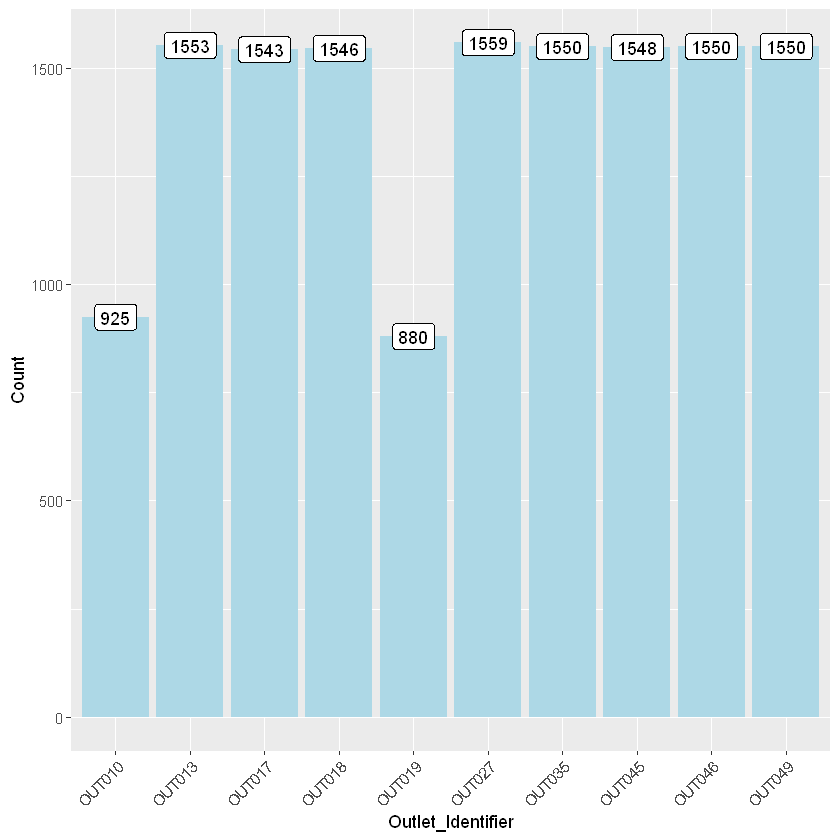

In [15]:
# Plot for Outlet_Identifier
p5 = ggplot(combi %>% group_by(Outlet_Identifier) %>% summarise(Count = n())) + 
  geom_bar(aes(Outlet_Identifier, Count), stat = "identity", fill = "light blue") +
  geom_label(aes(Outlet_Identifier, Count, label = Count), vjust = 0.5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

p5

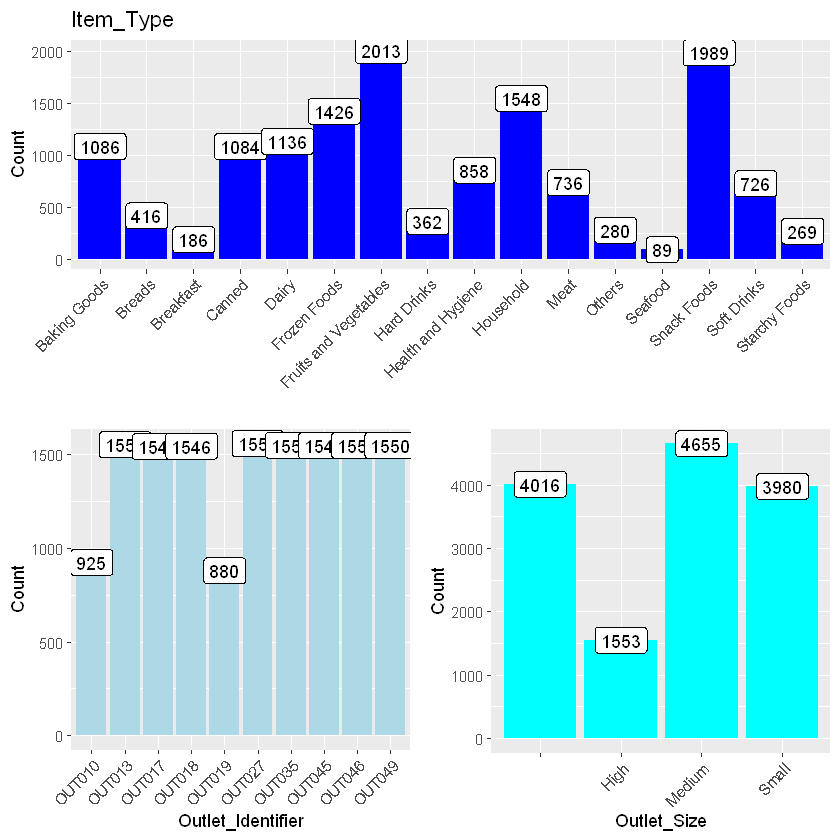

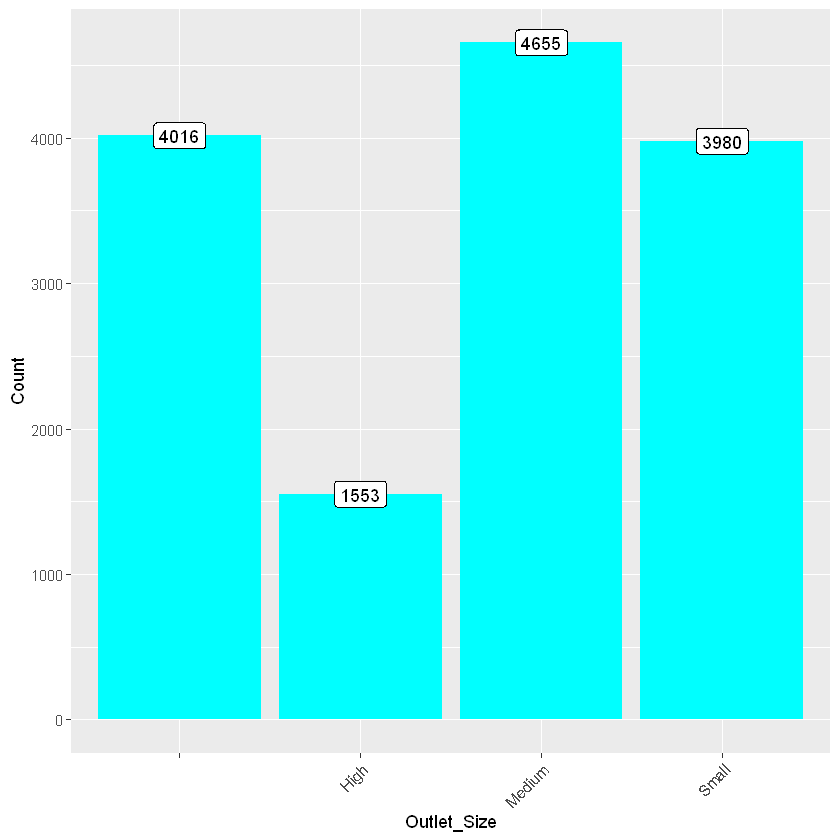

In [16]:
# Plot for Outlet_Size
p6 = ggplot(combi %>% group_by(Outlet_Size) %>% summarise(Count = n())) + 
  geom_bar(aes(Outlet_Size, Count), stat = "identity", fill = "cyan") +
  geom_label(aes(Outlet_Size, Count, label = Count), vjust = 0.5) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

second_row = plot_grid(p5, p6, nrow = 1)
plot_grid(p4, second_row, ncol = 1)

p6

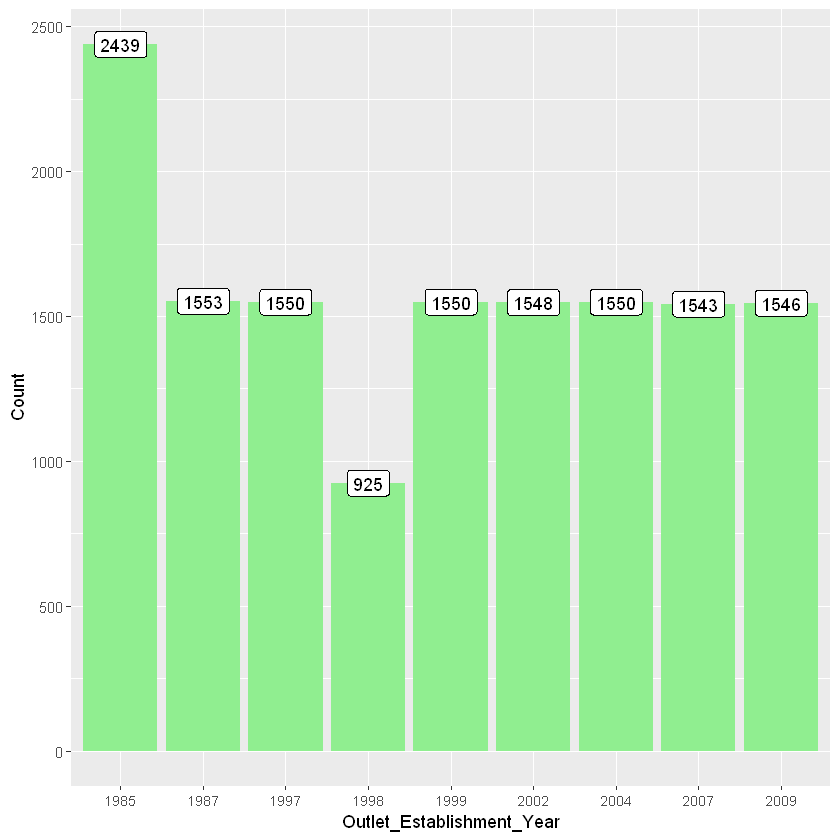

In [17]:
# Plot for Outlet_Establishment_Year
p7 = ggplot(combi %>% group_by(Outlet_Establishment_Year) %>% summarise(Count = n())) + 
  geom_bar(aes(factor(Outlet_Establishment_Year), Count), stat = "identity", fill = "light green") +
  geom_label(aes(factor(Outlet_Establishment_Year), Count, label = Count), vjust = 0.5) +
  xlab("Outlet_Establishment_Year") +
  theme(axis.text.x = element_text(size = 8.5))

p7

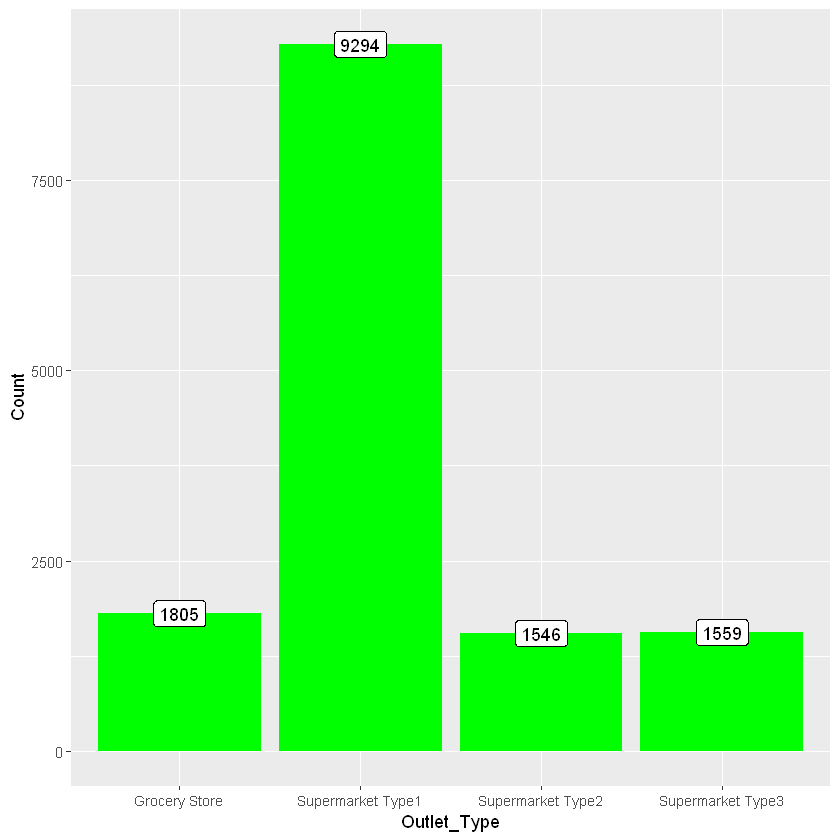

In [18]:
# Plot for Outlet_Type
p8 = ggplot(combi %>% group_by(Outlet_Type) %>% summarise(Count = n())) + 
  geom_bar(aes(Outlet_Type, Count), stat = "identity", fill = "green") +
  geom_label(aes(factor(Outlet_Type), Count, label = Count), vjust = 0.5) +
  theme(axis.text.x = element_text(size = 8.5))

p8

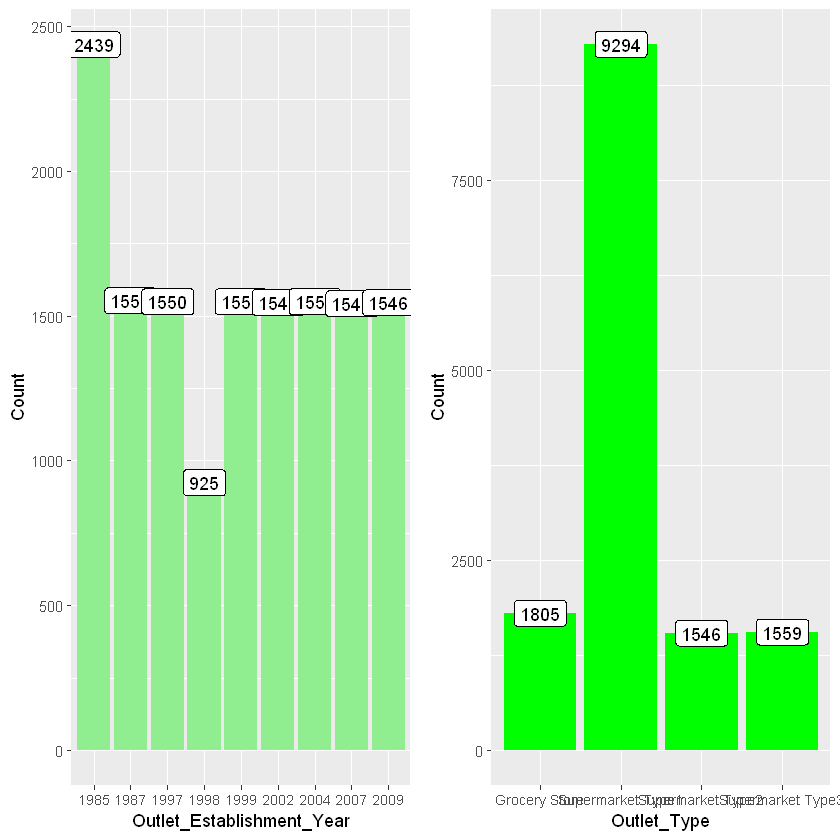

In [19]:
# Ploting Both Plots Together
plot_grid(p7, p8, ncol = 2)

<br>

## Bivariate Analysis

#### We shall now explore the independent variables with respect to the target variable

In [20]:
train = combi[1:nrow(train)] # extracting train data from the combined data

<br>

#### Target Variable vs Independent Numerical Variables

Warning message:
"Removed 1463 rows containing missing values (geom_point)."

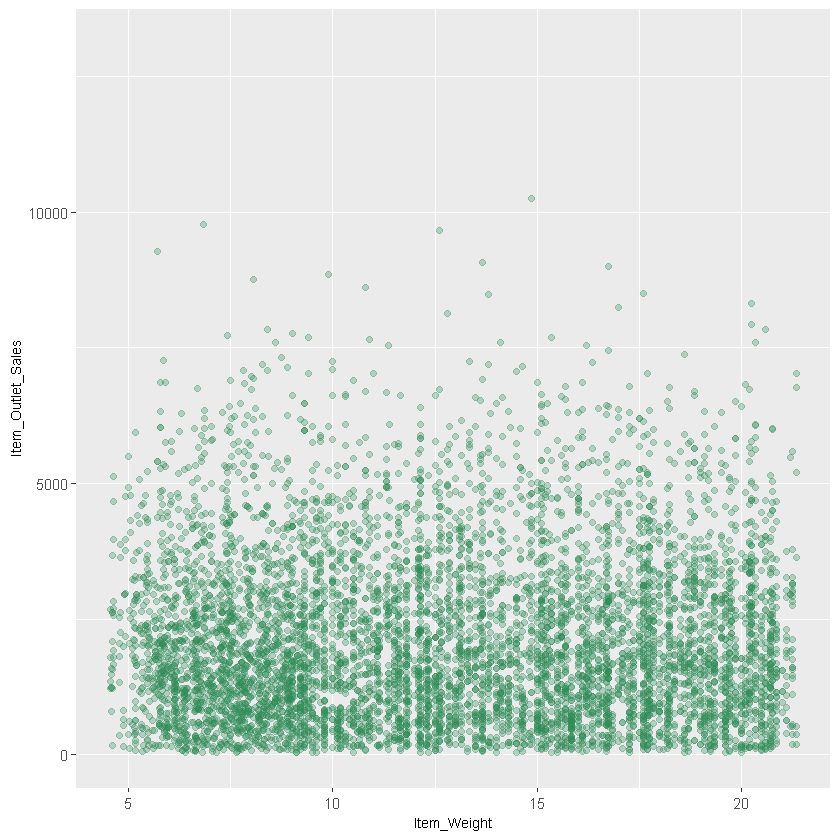

In [21]:
# Item_Weight vs Item_Outlet_Sales

p9 = ggplot(train) + 
  geom_point(aes(Item_Weight, Item_Outlet_Sales), colour = "sea green", alpha = 0.3) +
  theme(axis.title = element_text(size = 8.5))

p9

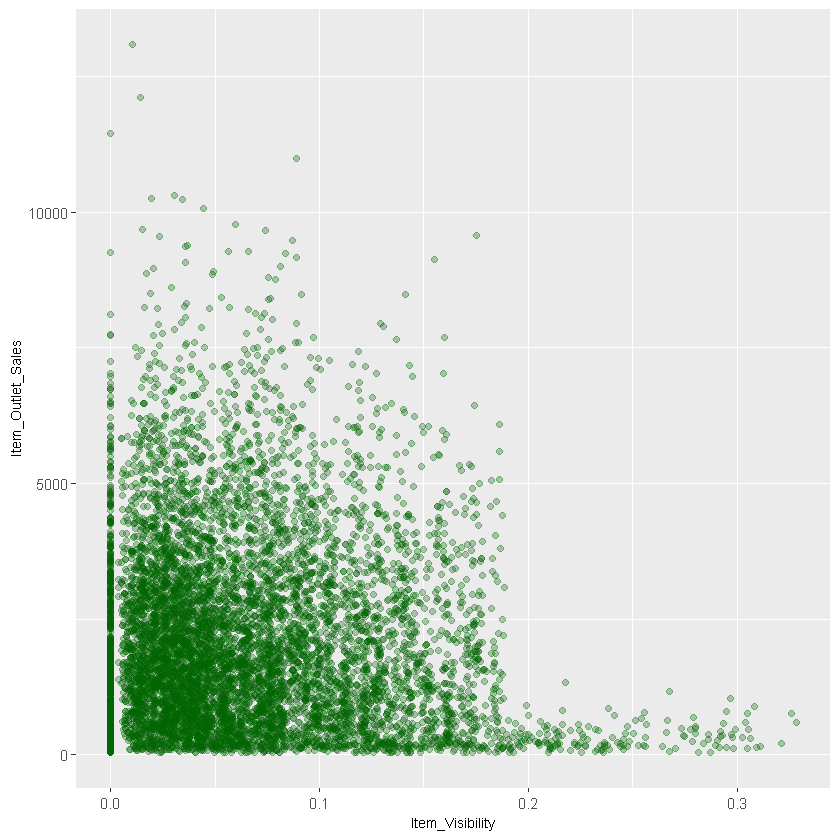

In [22]:
# Item_Visibility vs Item_Outlet_Sales
p10 = ggplot(train) + 
  geom_point(aes(Item_Visibility, Item_Outlet_Sales), colour = "dark green", alpha = 0.3) +
  theme(axis.title = element_text(size = 8.5))

p10

Warning message:
"Removed 1463 rows containing missing values (geom_point)."

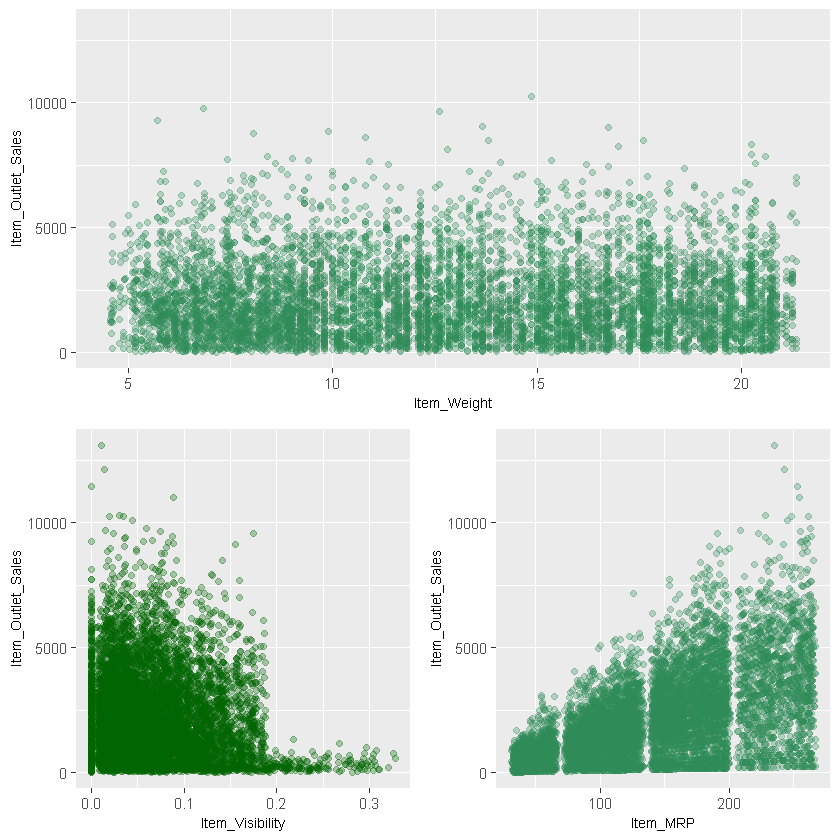

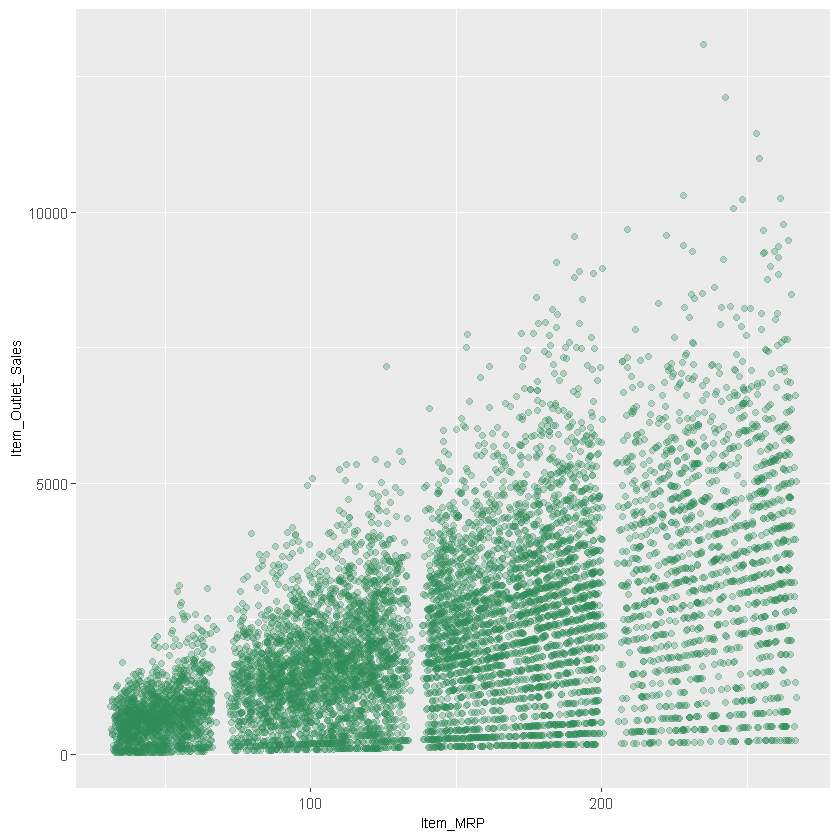

In [23]:
# Item_MRP vs Item_Outlet_Sales
p11 = ggplot(train) + 
  geom_point(aes(Item_MRP, Item_Outlet_Sales), colour = "sea green", alpha = 0.3) +
  theme(axis.title = element_text(size = 8.5))
second_row_2 = plot_grid(p10, p11, ncol = 2)
plot_grid(p9, second_row_2, nrow = 2)

p11

<br>

#### Target Variable vs Independent Categorical Variables

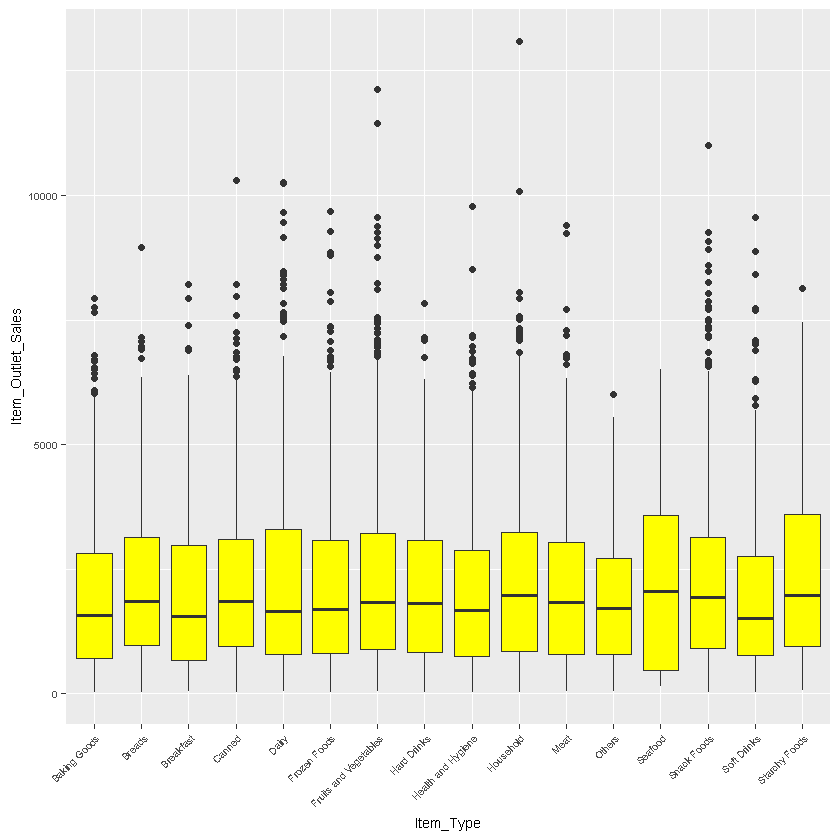

In [24]:
# Item_Type vs Item_Outlet_Sales
p12 = ggplot(train) + 
  geom_boxplot(aes(Item_Type, Item_Outlet_Sales), fill = "yellow") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text = element_text(size = 6),
        axis.title = element_text(size = 8.5))

p12

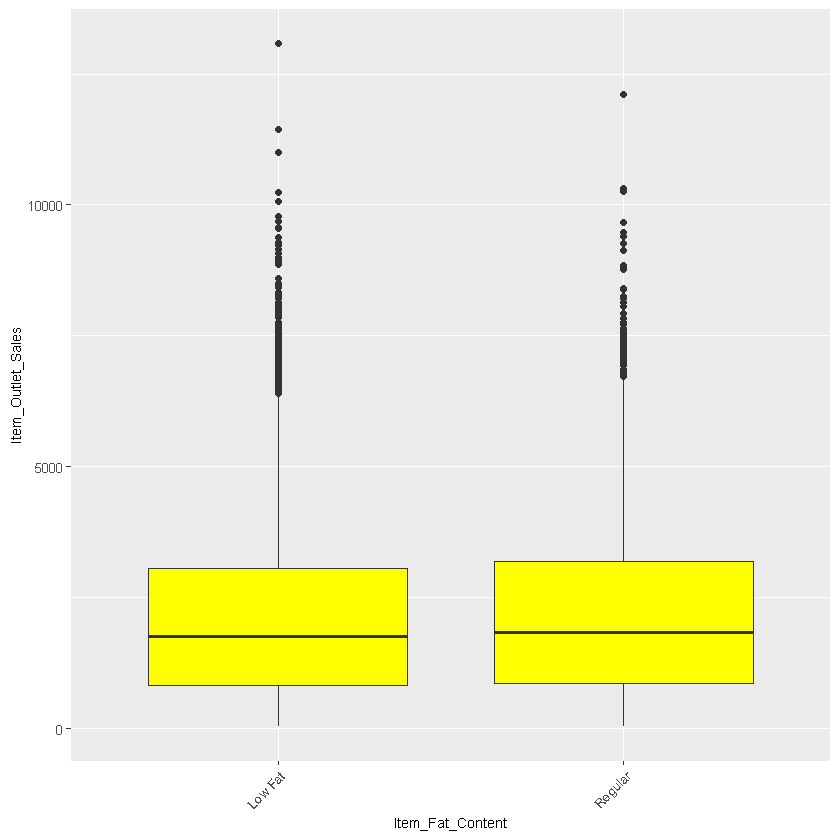

In [25]:
# Item_Fat_Content vs Item_Outlet_Sales
p13 = ggplot(train) + 
  geom_boxplot(aes(Item_Fat_Content, Item_Outlet_Sales), fill = "yellow") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 8.5))

p13

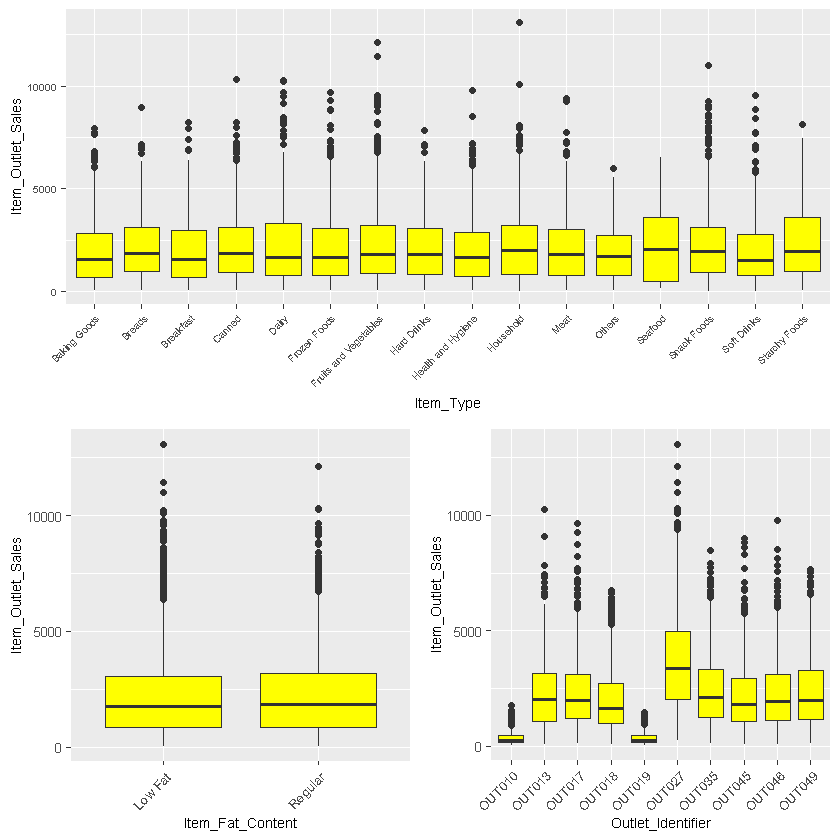

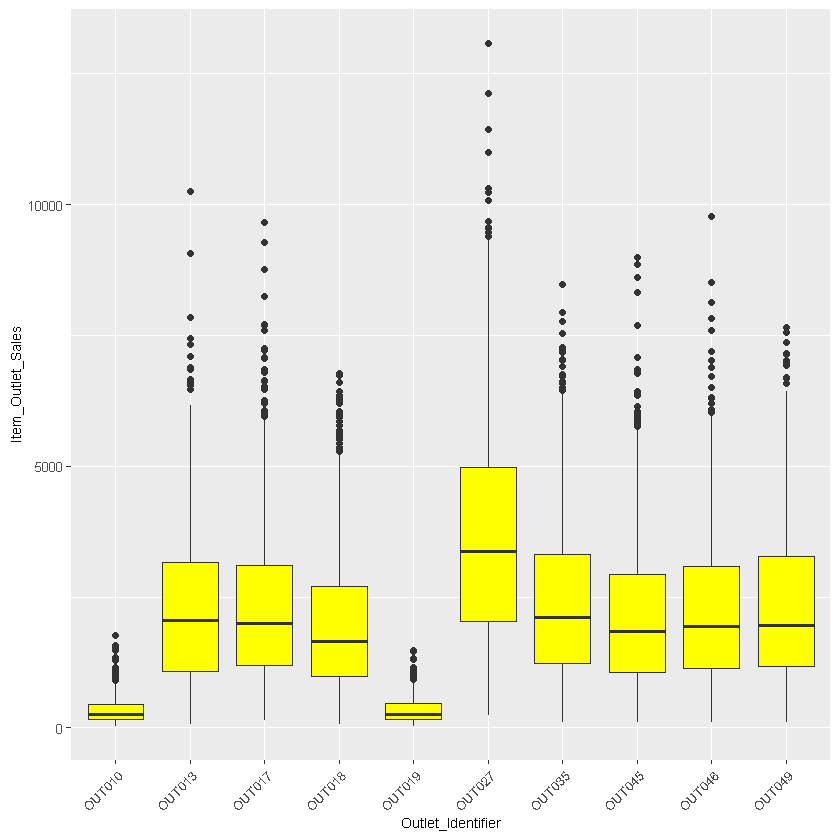

In [26]:
# Outlet_Identifier vs Item_Outlet_Sales
p14 = ggplot(train) + 
  geom_boxplot(aes(Outlet_Identifier, Item_Outlet_Sales), fill = "yellow") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text = element_text(size = 8),
        axis.title = element_text(size = 8.5))
second_row_3 = plot_grid(p13, p14, ncol = 2)
plot_grid(p12, second_row_3, ncol = 1)

p14

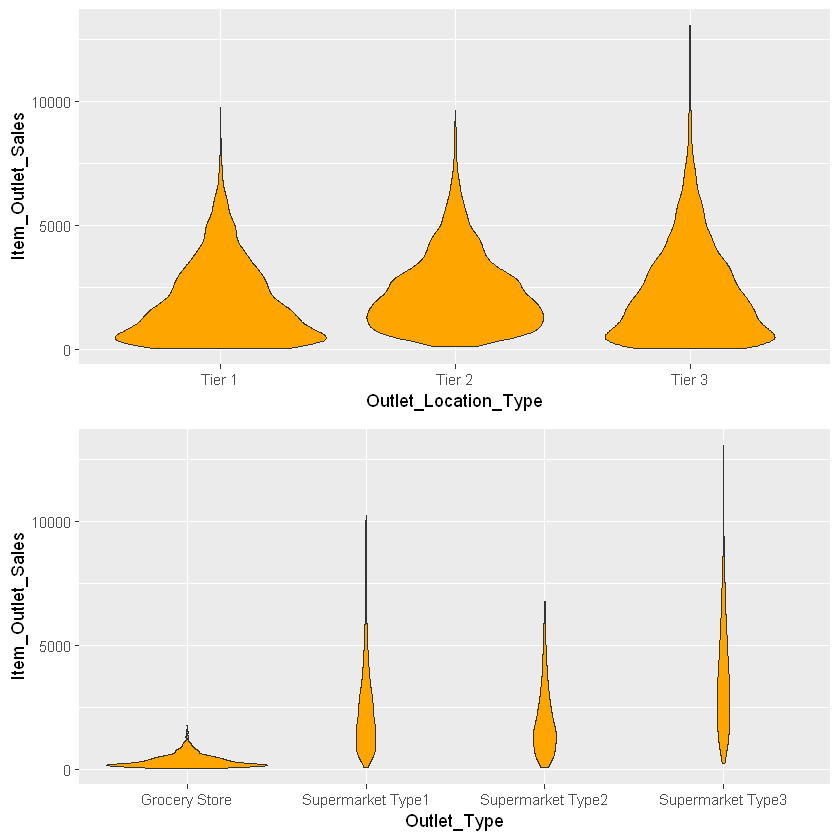

In [27]:
#Remaining Variables

p15 = ggplot(train) + geom_violin(aes(Outlet_Location_Type, Item_Outlet_Sales), fill = "orange")
p16 = ggplot(train) + geom_violin(aes(Outlet_Type, Item_Outlet_Sales), fill = "orange")
plot_grid(p15, p16, ncol = 1)

<br><br>

## Initial PreProcessing

### Missing Value Treatment:

#### There are different methods to treat missing values based on the problem and the data. Some of the common techniques are as follows:
  
#### 1. Deletion of rows: In train dataset, observations having missing values in any variable are deleted. The downside of this method is the loss of information and drop in prediction power of model.

#### 2. Mean/Median/Mode Imputation: In case of continuous variable, missing values can be replaced with mean or median of all known values of that variable. For categorical variables, we can use mode of the given values to replace the missing values.

#### 3. Building Prediction Model: We can even make a predictive model to impute missing data in a variable. Here we will treat the variable having missing data as the target variable and the other variables as predictors. We will divide our data into 2 datasets-one without any missing value for that variable and the other with missing values for that variable. The former set would be used as training set to build the predictive model and it would then be applied to the latter set to predict the missing values.

<br>

#### Finding Missing Values in a Variable

In [28]:
sum(is.na(combi$Item_Weight))

[1] 2439

In [29]:
#Imputing Missing Values

missing_index = which(is.na(combi$Item_Weight))
for(i in missing_index){
  
  item = combi$Item_Identifier[i]
  combi$Item_Weight[i] = mean(combi$Item_Weight[combi$Item_Identifier == item], na.rm = T)
}


In [30]:
#Cross Checking

sum(is.na(combi$Item_Weight))

[1] 0

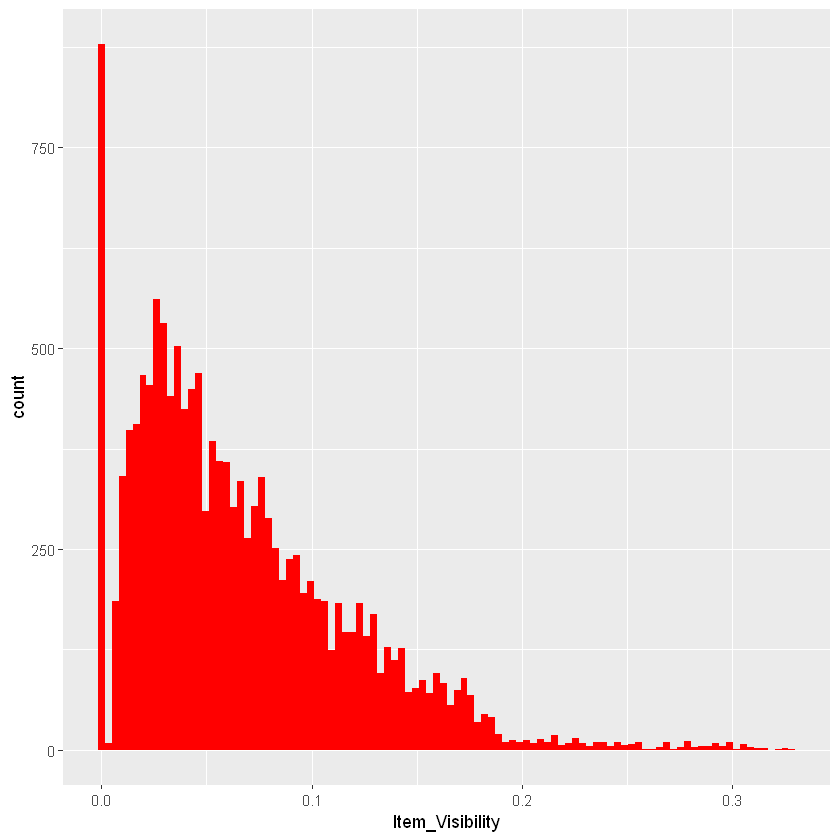

In [31]:
#Replacing 0's in Item_Visibility variable

ggplot(combi) + geom_histogram(aes(Item_Visibility), bins = 100, fill = "red")

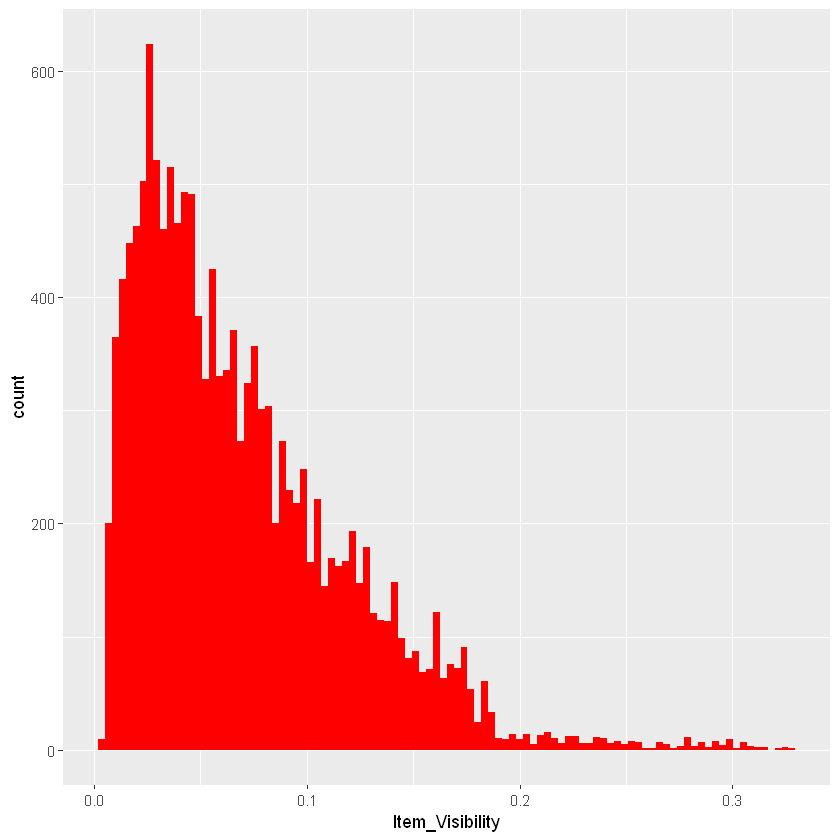

In [32]:
#Replacing the zeroes

zero_index = which(combi$Item_Visibility == 0)
for(i in zero_index){
  item = combi$Item_Identifier[i]
  combi$Item_Visibility[i] = mean(combi$Item_Visibility[combi$Item_Identifier == item], na.rm = T)
}

ggplot(combi) + geom_histogram(aes(Item_Visibility), bins = 100, fill = "red")

<br><br>

## Feature Engineering
#### Feature Engineering is performed on Clean Data.
<br>

### We can create the following new features:
  
#### 1. Item_Type_new: Broader categories for the variable Item_Type.
#### 2. Item_category: Categorical variable derived from Item_Identifier.
#### 3. Outlet_Years: Years of operation for outlets.
#### 4. price_per_unit_wt: Item_MRP/Item_Weight
#### 5. Item_MRP_clusters: Binned feature for Item_MRP.


<br>

#### Item_Type variable and classify the categories into perishable and non_perishable 
#### As per our understanding and make it into a New Feature.


In [33]:
perishable = c("Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood")
non_perishable = c("Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks")

In [34]:
#Create a new feature 'Item_Type_new'
combi[,Item_Type_new := ifelse(Item_Type %in% perishable, "perishable", 
                        ifelse(Item_Type %in% non_perishable, "non_perishable", "not_sure"))]


In [35]:
#Let's compare Item_Type with the first 2 characters of Item_Identifier, i.e., 'DR', 'FD', and 'NC'. 
#These identifiers most probably stand for drinks, food, and non-consumable.

table(combi$Item_Type, substr(combi$Item_Identifier, 1, 2))


                       
                          DR   FD   NC
  Baking Goods             0 1086    0
  Breads                   0  416    0
  Breakfast                0  186    0
  Canned                   0 1084    0
  Dairy                  229  907    0
  Frozen Foods             0 1426    0
  Fruits and Vegetables    0 2013    0
  Hard Drinks            362    0    0
  Health and Hygiene       0    0  858
  Household                0    0 1548
  Meat                     0  736    0
  Others                   0    0  280
  Seafood                  0   89    0
  Snack Foods              0 1989    0
  Soft Drinks            726    0    0
  Starchy Foods            0  269    0

In [36]:
# Item_category Created

combi[,Item_category := substr(combi$Item_Identifier, 1, 2)]

In [37]:
#Outlet_Years (years of operation) and price_per_unit_wt (price per unit weight).

combi$Item_Fat_Content[combi$Item_category == "NC"] = "Non-Edible"

In [38]:
#Years of Operation for Outlets

combi[,Outlet_Years := 2013 - Outlet_Establishment_Year]
combi$Outlet_Establishment_Year = as.factor(combi$Outlet_Establishment_Year)

In [39]:
#Price per Unit Weight

combi[,price_per_unit_wt := Item_MRP/Item_Weight]

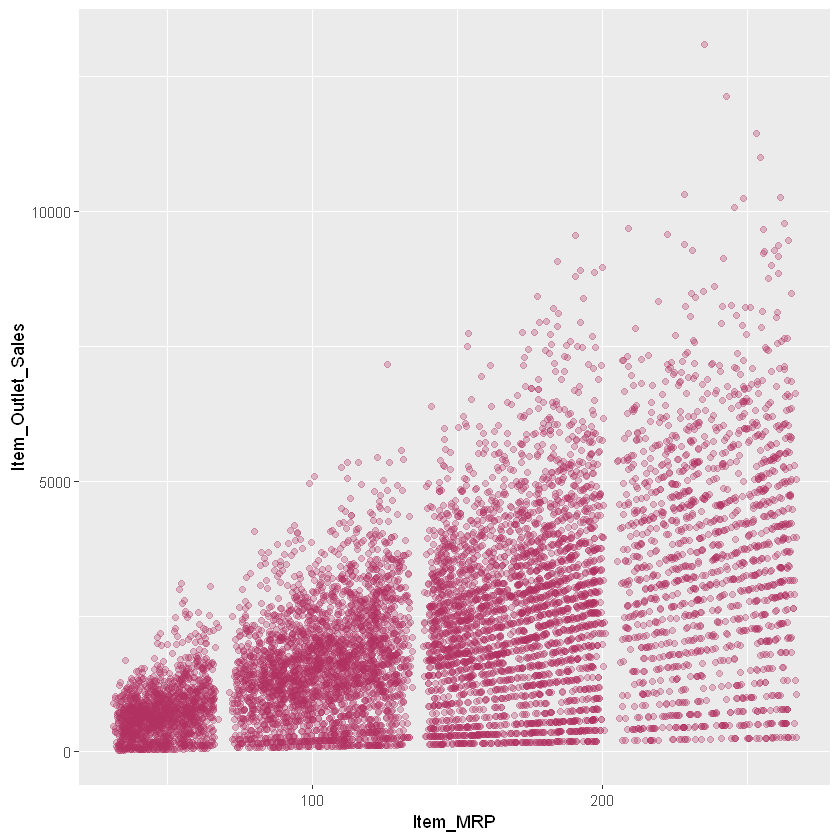

In [40]:
ggplot(train) + geom_point(aes(Item_MRP, Item_Outlet_Sales), colour = "maroon", alpha = 0.3)

The Item_MRP vs Item_Outlet_Sales plot, we saw Item_MRP was spread across in 4 chunks. Now let's assign a label to each of these chunks and use this label as a new variable.


In [41]:
#Creating new independent variable - Item_MRP_clusters

combi[,Item_MRP_clusters := ifelse(Item_MRP < 69, "1st", 
                                   ifelse(Item_MRP >= 69 & Item_MRP < 136, "2nd",
                                          ifelse(Item_MRP >= 136 & Item_MRP < 203, "3rd", "4th")))]

<br><br>

## Final PreProcessing
#### Data is finally processed one last time before we can generate our models  

<br><br>

### Encoding Categorical Variables

#### Most of the machine learning algorithms produce better result with numerical variables only. So, it is essential to treat the categorical variables present in the data

#### We will use 2 techniques - Label Encoding and One Hot Encoding.

#### 1. Label encoding. simply means converting each category in a variable to a number. It is more suitable for ordinal variables - categorical variables with some order.

#### 2. One hot encoding. here, each category of a categorical variable is converted into a new binary column (1/0).


<br>  

#### Label Encoding

In [42]:
#For the categorical variables

combi[,Outlet_Size_num := ifelse(Outlet_Size == "Small", 0,
                                 ifelse(Outlet_Size == "Medium", 1, 2))]
combi[,Outlet_Location_Type_num := ifelse(Outlet_Location_Type == "Tier 3", 0,
                                          ifelse(Outlet_Location_Type == "Tier 2", 1, 2))]

In [43]:
#Removing categorical variables after label encoding

combi[, c("Outlet_Size", "Outlet_Location_Type") := NULL]

<br>  
 
#### One Hot encoding 

In [44]:
#For the categorical variable

ohe = dummyVars("~.", data = combi[,-c("Item_Identifier", "Outlet_Establishment_Year", "Item_Type")], fullRank = T)
ohe_df = data.table(predict(ohe, combi[,-c("Item_Identifier", "Outlet_Establishment_Year", "Item_Type")]))
combi = cbind(combi[,"Item_Identifier"], ohe_df)

<br><br>

### Skewness

In [45]:
#Removing Skewness

combi[,Item_Visibility := log(Item_Visibility + 1)] 
#log + 1 to avoid division by zero
combi[,price_per_unit_wt := log(price_per_unit_wt + 1)]

Let us Scale and Center the Numeric Variables to make them have a mean of 0. <br>
Standard Deviation of one and scale of 0 to 1. <br>
Scaling and Centering is required for Linear Regression Models. 

In [46]:
#Scaling Numeric predictors

num_vars = which(sapply(combi, is.numeric)) # index of numeric features
num_vars_names = names(num_vars)
combi_numeric = combi[,setdiff(num_vars_names, "Item_Outlet_Sales"), with = F]
prep_num = preProcess(combi_numeric, method=c("center", "scale"))
combi_numeric_norm = predict(prep_num, combi_numeric)

combi[,setdiff(num_vars_names, "Item_Outlet_Sales") := NULL] # removing numeric independent variables
combi = cbind(combi, combi_numeric_norm)

In [47]:
#Splitting the combined data combi back to train and test set.

train = combi[1:nrow(train)]
test = combi[(nrow(train) + 1):nrow(combi)]
test[,Item_Outlet_Sales := NULL] # removing Item_Outlet_Sales as it contains only NA for test dataset

#### Plotting a Corelation Plot

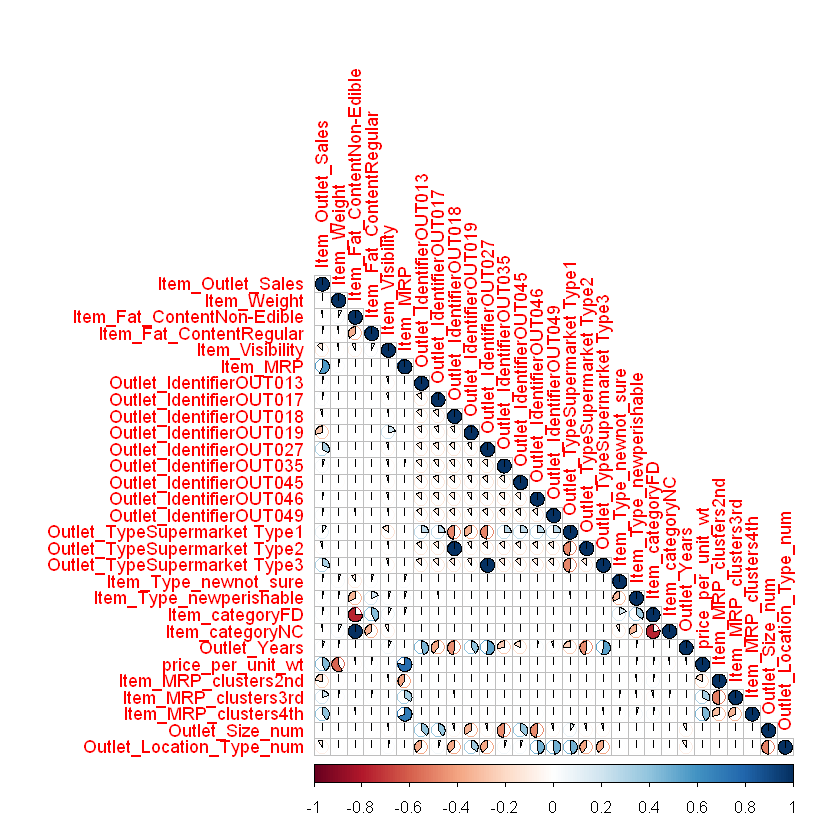

In [48]:
#Correlated Variables

cor_train = cor(train[,-c("Item_Identifier")])
corrplot(cor_train, method = "pie", type = "lower", tl.cex = 0.9)

<br><br><br>
  
## Model Building
<br>  

### Linear Regression

In [49]:
#Building Model

linear_reg_mod = lm(Item_Outlet_Sales ~ ., data = train[,-c("Item_Identifier")])
#Summary(linear_reg_mod)

In [50]:
#Making Predictions on test Data

#Preparing dataframe for submission and writing it in a csv file
submission$Item_Outlet_Sales = predict(linear_reg_mod, test[,-c("Item_Identifier")])
write.csv(submission, "Linear_Reg_Submit.csv", row.names = F)

Warning message in predict.lm(linear_reg_mod, test[, -c("Item_Identifier")]):
"prediction from a rank-deficient fit may be misleading"

#### Lasso Regression

In [51]:
set.seed(1235)
my_control = trainControl(method="cv", number=5)
Grid = expand.grid(alpha = 1, lambda = seq(0.001,0.1,by = 0.0002))

lasso_linear_reg_mod = train(x = train[, -c("Item_Identifier", "Item_Outlet_Sales")], y = train$Item_Outlet_Sales,
                             method='glmnet', trControl= my_control, tuneGrid = Grid)

In [52]:
#Mean validation score

mean(lasso_linear_reg_mod$resample$RMSE)

[1] 1129.53

#### Ridge Regression

In [53]:
set.seed(1236)
my_control = trainControl(method="cv", number=5)
Grid = expand.grid(alpha = 0, lambda = seq(0.001,0.1,by = 0.0002))

ridge_linear_reg_mod = train(x = train[, -c("Item_Identifier", "Item_Outlet_Sales")], y = train$Item_Outlet_Sales,
                             method='glmnet', trControl= my_control, tuneGrid = Grid)

In [54]:
#Mean validation score
mean(ridge_linear_reg_mod$resample$RMSE)

[1] 1134.585

<br>  

### Random Forest 

In [55]:
install.packages("ranger")
library(ranger)
set.seed(1237)
my_control = trainControl(method="cv", number=5)

tgrid = expand.grid(
  .mtry = c(3:10),
  .splitrule = "variance",
  .min.node.size = c(10,15,20)
)

rf_mod = train(x = train[, -c("Item_Identifier", "Item_Outlet_Sales")], 
               y = train$Item_Outlet_Sales,
               method='ranger', 
               trControl= my_control, 
               tuneGrid = tgrid,
               num.trees = 400,
               importance = "permutation")


Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'ranger' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Warning message:
"package 'ranger' was built under R version 3.6.3"

In [56]:
#Mean validation score
mean(rf_mod$resample$RMSE)

[1] 1086.932

<br>  

### Best Model Parameters

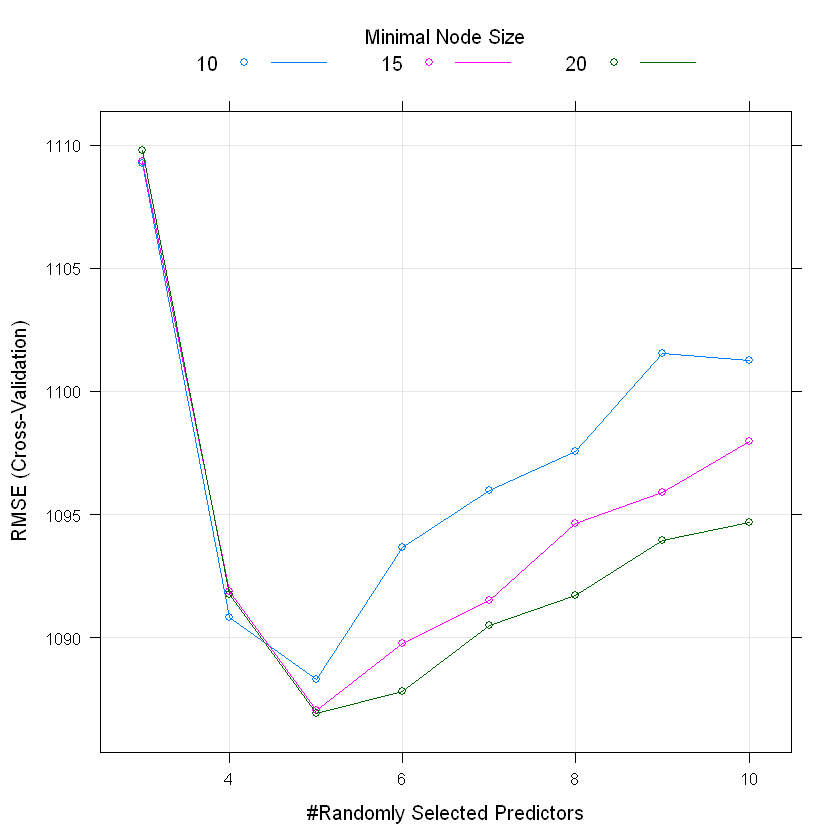

In [57]:
#Plotting a Graph to Choose the Best Model
plot(rf_mod)

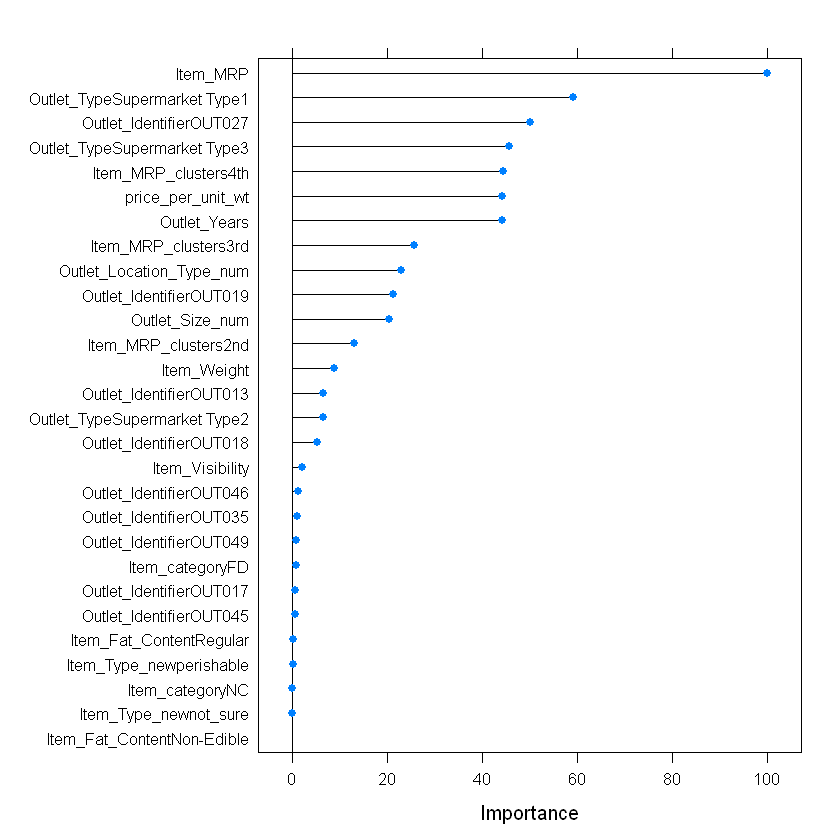

In [58]:
#Variable Importance

plot(varImp(rf_mod))

<br>  

### XGBoost

In [59]:
param_list = list(
  
  objective = "reg:linear",
  eta=0.01,
  gamma = 1,
  max_depth=6,
  subsample=0.8,
  colsample_bytree=0.5
)
dtrain = xgb.DMatrix(data = as.matrix(train[,-c("Item_Identifier", "Item_Outlet_Sales")]), label= train$Item_Outlet_Sales)
dtest = xgb.DMatrix(data = as.matrix(test[,-c("Item_Identifier")]))

In [60]:
#Variable Importance

set.seed(112)
xgbcv = xgb.cv(params = param_list, 
               data = dtrain, 
               nrounds = 1000, 
               nfold = 5, 
               print_every_n = 10, 
               early_stopping_rounds = 30, 
               maximize = F)

[18:19:29] WARNING: amalgamation/../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:19:29] WARNING: amalgamation/../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:19:29] WARNING: amalgamation/../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:19:29] WARNING: amalgamation/../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[18:19:29] WARNING: amalgamation/../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[1]	train-rmse:2746.479004+11.271653	test-rmse:2746.308887+46.153854 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 30 rounds.

[11]	train-rmse:2538.175195+10.923477	test-rmse:2539.235694+45.345977 
[21]	train-rmse:2349.708349+10.664128	test-rmse:2352.635449+44.8044

<br><br><br>

## Model Training and Evaluation

In [61]:
xgb_model = xgb.train(data = dtrain, params = param_list, nrounds = 430)

[18:20:01] WARNING: amalgamation/../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


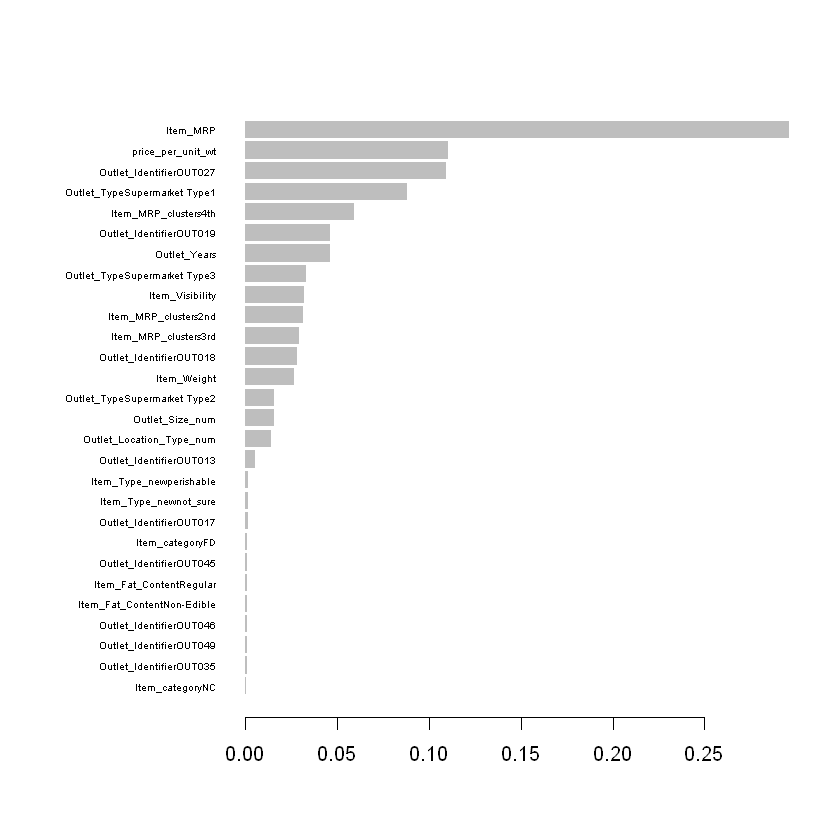

In [62]:
#Variable Importance

var_imp = xgb.importance(feature_names = setdiff(names(train), c("Item_Identifier", "Item_Outlet_Sales")), model = xgb_model)

xgb.plot.importance(var_imp)